## 영업이익율에 따른 매수 전략

###    영업이익률 = (영업이익/매출액) * 100

- 영업이익이 좋다라는 뜻은 " 이 회사가 얼마나 본업에서 충실하게 수익을 창출하고 있는가"를 뜻함

### 재무제표 가져오기

재무제표 URL https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=종목코드&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701

재무비율 URL https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=종목코드&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701

In [5]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime 
import time 
import urllib.request
from selenium.webdriver import Chrome
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait

gb- 0: 재무제표, 1: 재무비율

In [6]:
#재무재표 크롤링을 위한 주소 가져오기
def get_html(ticker, gb):

    url=[]

    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=A" + ticker + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701")
    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A" + ticker + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701")

    if gb>3 :
        return None

    url = url[gb]
    try:

        response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text)

    except AttributeError as e :
        return None
  
    return soup

In [7]:
# 삼성전자의 재무제표
text = get_html('005930',0)
# text

재무제표에서 필요한 데이터만 추출하기 
- 연간 데이터만 사용

In [8]:
def fin_data(ticker,gb,item,n,freq="a") :
# n: 최근 몇 개의 데이터를 가져 올것인지
#  freq: Y : 연간재무, Q : 분기재무 
    soup = get_html(ticker,gb)
    d = soup.find_all(text=item)


    if(len(soup)==0) :
        return None
    
    #재무제표면 최근 3년을 가져오고 재무비율이면 최근 4년치를 가져온다.
    nlimit =3 if gb==0 else 4

    if n > nlimit :
        return None
    if freq == 'a':
        #연간 데이터
        d_ = d[0].find_all_next(class_="r",limit=nlimit)
        # 분기 데이터
#     elif freq =='q':
#         d_ = d[1].find_all_next(class_="r",limit=nlimit)
    else:
        d_ = None

    try :
        data = d_[(nlimit-n):nlimit]
        v = [v.text for v in data]

    except AttributeError as e:
        return None

    return(v)

In [9]:
# 삼성전자의 최근 3년치의 매출액증가율 (마지막은2019년도 이므로 제외)
fin_data("005930",1,"매출액증가율",4,"a")

['0.6', '18.7', '1.8', '-5.5']

In [10]:
#최근 3년치의 영업이익률
fin_data("005930",1,"영업이익률",4,"a")

['14.5', '22.4', '24.2', '12.1']

시가총액 1-41위 기업중 영업이익에 따른 기업 선택

In [11]:
! git clone "https://github.com/FinanceData/marcap.git" marcap

fatal: destination path 'marcap' already exists and is not an empty directory.


    Date : 날짜 (DatetimeIndex)
    Code : 종목코드
    Name : 종명이름
    Open : 시가
    High : 고가
    Low : 저가
    Close : 종가
    Volume : 거래량
    Amount : 거래대금
    Changes : 전일대비
    ChagesRatio : 전일비
    Marcap : 시가총액(백만원)
    Stocks : 상장주식수
    MarcapRatio : 시가총액비중(%)
    ForeignShares : 외국인 보유주식수
    ForeignRatio : 외국인 지분율(%)
    Rank: 시가총액 순위 (당일)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from marcap import marcap_data

In [13]:
df = pd.read_csv('marcap/data/marcap-2019.csv.gz', dtype={'Code':str}, parse_dates=['Date'], encoding='utf-8')

In [14]:
df = marcap_data('2019-01-01','2020-01-01')
df.head()

,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank
Date,,,,,,,,,,,,,,,,
2019-01-02,005930,삼성전자,38750.0,50.0,0.1,7847664.0,3.046826e+11,39400.0,39400.0,38550.0,2.313291e+14,14.87,5.969783e+09,3.319573e+09,55.61,1.0
2019-01-02,000660,SK하이닉스,60600.0,100.0,0.2,1934295.0,1.174588e+11,61300.0,61400.0,60000.0,4.411694e+13,2.84,7.280024e+08,3.523115e+08,48.39,2.0
2019-01-02,068270,셀트리온,214500.0,-8000.0,-3.6,1045357.0,2.285731e+11,224500.0,226000.0,213000.0,2.691034e+13,1.73,1.254561e+08,2.473005e+07,19.71,3.0
2019-01-02,005935,삼성전자우,31600.0,-150.0,-0.5,944879.0,3.020400e+10,32700.0,32800.0,31300.0,2.600322e+13,1.67,8.228867e+08,7.587485e+08,92.21,4.0
2019-01-02,207940,삼성바이오로직스,374000.0,-12500.0,-3.2,148344.0,5.654277e+10,389500.0,392000.0,372000.0,2.474571e+13,1.59,6.616500e+07,5.706595e+06,8.62,5.0


상위 41개 기업 추출

In [15]:
df_data = pd.DataFrame(data=df, columns=['Code', 'Name', 'Close', 'Open', 'Marcap', 'Rank', 'Volume','Amount'])
marcap_rank = df_data['Rank'] <= 41
rank_data = df_data[marcap_rank]
rank_data

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
Date,,,,,,,,
2019-01-02,005930,삼성전자,38750.0,39400.0,2.313291e+14,1.0,7847664.0,3.046826e+11
2019-01-02,000660,SK하이닉스,60600.0,61300.0,4.411694e+13,2.0,1934295.0,1.174588e+11
2019-01-02,068270,셀트리온,214500.0,224500.0,2.691034e+13,3.0,1045357.0,2.285731e+11
2019-01-02,005935,삼성전자우,31600.0,32700.0,2.600322e+13,4.0,944879.0,3.020400e+10
2019-01-02,207940,삼성바이오로직스,374000.0,389500.0,2.474571e+13,5.0,148344.0,5.654277e+10
...,...,...,...,...,...,...,...,...
2019-12-30,011170,롯데케미칼,224000.0,228500.0,7.677694e+12,37.0,113754.0,2.555484e+10
2019-12-30,091990,셀트리온헬스케어,53000.0,54000.0,7.628187e+12,38.0,643498.0,3.425742e+10
2019-12-30,030200,KT,27000.0,26850.0,7.050019e+12,39.0,623282.0,1.676736e+10


1월 상위 41개 기업 DATA

In [16]:
rank_1 = rank_data[rank_data.index=="2019-01-02"]
rank_1.head()

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
Date,,,,,,,,
2019-01-02,005930,삼성전자,38750.0,39400.0,2.313291e+14,1.0,7847664.0,3.046826e+11
2019-01-02,000660,SK하이닉스,60600.0,61300.0,4.411694e+13,2.0,1934295.0,1.174588e+11
2019-01-02,068270,셀트리온,214500.0,224500.0,2.691034e+13,3.0,1045357.0,2.285731e+11
2019-01-02,005935,삼성전자우,31600.0,32700.0,2.600322e+13,4.0,944879.0,3.020400e+10
2019-01-02,207940,삼성바이오로직스,374000.0,389500.0,2.474571e+13,5.0,148344.0,5.654277e+10


우선주인 삼성전자우 를 제외하고 index를 정렬

In [17]:
rank_1 = rank_1.reset_index(drop=True)
rank_1 = rank_1.drop(3,0)
# 삼성전자우 는 제외하기
rank_1 = rank_1.reset_index(drop=True)
rank_1

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
0,005930,삼성전자,38750.0,39400.0,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,60600.0,61300.0,4.411694e+13,2.0,1934295.0,1.174588e+11
2,068270,셀트리온,214500.0,224500.0,2.691034e+13,3.0,1045357.0,2.285731e+11
3,207940,삼성바이오로직스,374000.0,389500.0,2.474571e+13,5.0,148344.0,5.654277e+10
4,005380,현대차,114000.0,117500.0,2.435817e+13,6.0,565493.0,6.511241e+10
5,051910,LG화학,337000.0,351000.0,2.378962e+13,7.0,227694.0,7.783693e+10
6,017670,SK텔레콤,272500.0,267500.0,2.200321e+13,8.0,129645.0,3.516252e+10
7,015760,한국전력,34050.0,33150.0,2.185888e+13,9.0,1503315.0,5.117194e+10
8,005490,POSCO,237000.0,244500.0,2.066328e+13,10.0,175260.0,4.186762e+10
9,028260,삼성물산,104000.0,105500.0,1.972776e+13,11.0,246954.0,2.580417e+10


지난 3년동안 영업이익률이 20 이상인 기업 추출

In [18]:
OIR = []
for i in range(len(rank_1)):
    cnt = 0
    code = rank_1['Code'][i]
    for j in range(3):
        if float(fin_data(code,1,"영업이익률",4,"a")[j]) >  20 :
            cnt = cnt + 1
#             print(float(fin_data(code,1,"영업이익률",4,"a")[j]))

    if cnt == 3 : 
        OIR.append(code)
    

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [19]:
OIR

['068270', '033780', '036570']

In [20]:
bool_oir = rank_1["Code"].str.contains('068270|033780|036570')
code_oir = rank_1[bool_oir].reset_index(drop=True)
code_oir

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
0,068270,셀트리온,214500.0,224500.0,2.691034e+13,3.0,1045357.0,2.285731e+11
1,033780,KT&G,97600.0,100500.0,1.339975e+13,22.0,450182.0,4.413482e+10
2,036570,엔씨소프트,467000.0,464500.0,1.024552e+13,31.0,83710.0,3.901083e+10


In [21]:
for i in range(len(OIR)):
    code = OIR[i]
    name = code_oir['Name'][i]
    print(name ,fin_data(code,1,"영업이익률",4,"a"))

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


셀트리온 ['37.2', '53.5', '34.5', '33.5']
KT&G ['32.6', '30.6', '28.1', '27.9']
엔씨소프트 ['33.4', '33.3', '35.9', '28.2']


### 2019년 연간 수익률 계산
- 수익률 (12월종가 - 1월시가)/1월 시가 * 100

계산을 위해 FinanceDataReader로 2019년 해당 기업의 시가 종가 거래량 등의 데이터를 추출

In [22]:
import FinanceDataReader as fdr

In [23]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,반채운 윤규선 이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [24]:
#삼성전자 2019년
price = fdr.DataReader('005930', '2019-01-01' , '2019-12-31')
price.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
2019-01-09,38650,39600,38300,39600,17452708,0.039370
2019-01-10,40000,40150,39600,39800,14731699,0.005051
2019-01-11,40350,40550,39950,40500,11661063,0.017588
2019-01-14,40450,40700,39850,40050,11984996,-0.011111


In [25]:
for i in range(len(OIR)):
    name = code_oir['Name'][i]
    code = OIR[i]
    data = fdr.DataReader(code, '2019-01-01' , '2019-12-31')
    jan = data.loc['2019-01-02']['Open']
    dec = data.loc['2019-12-30']['Close']
    profit = (dec - jan) / jan * 100
    print(name , profit)

셀트리온 -15.590169286014083
KT&G -6.666666666666667
엔씨소프트 16.469321851453174


In [26]:
oir_1 = fdr.DataReader('068270', '2019-01-01' , '2019-12-31')
oir_2 = fdr.DataReader('033780', '2019-01-01' , '2019-12-31')
oir_3 = fdr.DataReader('036570', '2019-01-01' , '2019-12-31')

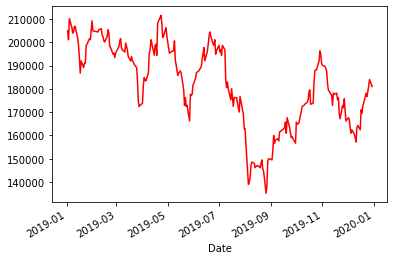

In [27]:
oir_1['Close'].plot(color='red', label='셀트리온')

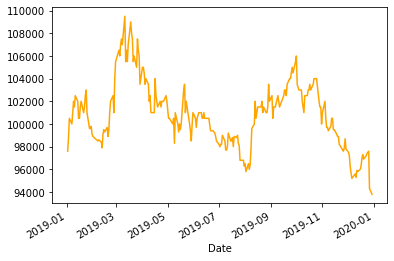

In [28]:
oir_2['Close'].plot(color='orange', label='KT&G')

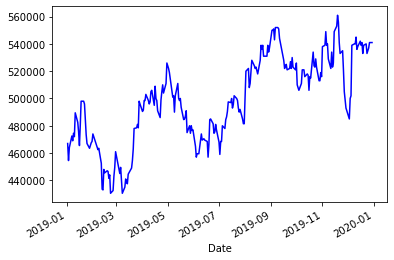

In [29]:
oir_3['Close'].plot(color='blue', label='엔씨소프트')

초기에 영업이익률이 3년간 20% 이상인 그룹의 2019년도 수익률은 엔씨소프트를 제외하고는 다소 좋다고 할 수 없다.
다만 해당 기업들의 미래가치가 높다고 평가 할 수 있으며 현재 셀트리온과 엔씨소프트의 시가총액은 2019년도보다 증가한 410,890억, 191,439억 임을 확인 할 수 있다.

## 3년간 영업이익률이 증가한 기업 

In [30]:
OIR_2 = []
for i in range(len(rank_1)):
    code = rank_1['Code'][i]
    oir1 = float(fin_data(code,1,"영업이익률",4,"a")[0])
    oir2 = float(fin_data(code,1,"영업이익률",4,"a")[1])
    oir3 = float(fin_data(code,1,"영업이익률",4,"a")[2])
    if (oir1<oir2) & (oir2<oir3):
        OIR_2.append(code)

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [31]:
OIR_2

['005930',
 '000660',
 '005490',
 '028260',
 '055550',
 '051900',
 '032830',
 '018260',
 '006400',
 '000810',
 '003550',
 '086790',
 '000030',
 '066570',
 '024110',
 '009150']

In [32]:
bool_oir_2 = rank_1["Code"].str.contains('005930|000660|005490|028260|055550|051900|032830|018260|006400|000810|003550|086790|000030|066570|024110|009150')
code_oir_2 = rank_1[bool_oir_2].reset_index(drop=True)
code_oir_2

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
0,005930,삼성전자,38750.0,39400.0,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,60600.0,61300.0,4.411694e+13,2.0,1934295.0,1.174588e+11
2,005490,POSCO,237000.0,244500.0,2.066328e+13,10.0,175260.0,4.186762e+10
3,028260,삼성물산,104000.0,105500.0,1.972776e+13,11.0,246954.0,2.580417e+10
4,055550,신한지주,39400.0,40350.0,1.868346e+13,14.0,868545.0,3.441367e+10
5,051900,LG생활건강,1081000.0,1106000.0,1.688327e+13,17.0,26387.0,2.901240e+10
6,032830,삼성생명,80300.0,81700.0,1.606000e+13,18.0,221030.0,1.779167e+10
7,018260,삼성에스디에스,206000.0,205000.0,1.593983e+13,19.0,99070.0,2.062928e+10
8,006400,삼성SDI,210500.0,222000.0,1.447493e+13,21.0,345548.0,7.376963e+10
9,000810,삼성화재,264500.0,268000.0,1.253064e+13,24.0,49598.0,1.311979e+10


In [33]:
for i in range(len(OIR_2)):
    cnt = 0
    code = OIR_2[i]
    name = code_oir_2['Name'][i]
    print(name ,fin_data(code,1,"영업이익률",4,"a"))

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


삼성전자 ['14.5', '22.4', '24.2', '12.1']
SK하이닉스 ['19.1', '45.6', '51.5', '10.1']
POSCO ['5.4', '7.6', '8.5', '6.0']
삼성물산 ['0.5', '3.0', '3.5', '2.8']
신한지주 ['14.0', '16.0', '18.9', '16.8']
LG생활건강 ['14.5', '15.2', '15.4', '15.3']
삼성생명 ['3.2', '5.3', '8.0', '3.9']
삼성에스디에스 ['7.7', '7.9', '8.7', '9.2']
삼성SDI ['-17.8', '1.8', '7.8', '4.6']
삼성화재 ['4.9', '5.7', '6.5', '3.7']
LG ['13.7', '18.5', '23.5', '15.6']
하나금융지주 ['4.7', '6.9', '9.7', '8.4']
우리은행 ['5.1', '6.6', '6.7', '9.1']
LG전자 ['2.4', '4.0', '4.4', '3.9']
기업은행 ['10.0', '12.1', '15.4', '13.2']
삼성전기 ['0.4', '4.5', '14.4', '9.1']


영업이익률이 증가하였지만 10미만에서 증하는 기업들이 있으므로 최근 년도의 증가율은 10% 이상인 기업만 골라낸다

In [34]:
OIR_3 = []
for i in range(len(OIR_2)):
    code = OIR_2[i]
    oir3 = float(fin_data(code,1,"영업이익률",4,"a")[2])
    if oir3 >= 10:
        OIR_3.append(OIR_2[i])

In [35]:
OIR_3

['005930', '000660', '055550', '051900', '003550', '024110', '009150']

In [36]:
bool_oir_3 = rank_1["Code"].str.contains('005930|000660|055550|051900|003550|024110|009150')
code_oir_3 = rank_1[bool_oir_3].reset_index(drop=True)
code_oir_3

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
0,005930,삼성전자,38750.0,39400.0,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,60600.0,61300.0,4.411694e+13,2.0,1934295.0,1.174588e+11
2,055550,신한지주,39400.0,40350.0,1.868346e+13,14.0,868545.0,3.441367e+10
3,051900,LG생활건강,1081000.0,1106000.0,1.688327e+13,17.0,26387.0,2.901240e+10
4,003550,LG,68100.0,69400.0,1.175114e+13,25.0,135878.0,9.348778e+09
5,024110,기업은행,13550.0,13950.0,7.587713e+12,40.0,1546090.0,2.110101e+10
6,009150,삼성전기,100000.0,104500.0,7.469370e+12,41.0,1052757.0,1.068763e+11


In [37]:
for i in range(len(code_oir_3)):
    code = code_oir_3['Code'][i]
    name = code_oir_3['Name'][i]
    print(name ,fin_data(code,1,"영업이익률",4,"a"))

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


삼성전자 ['14.5', '22.4', '24.2', '12.1']
SK하이닉스 ['19.1', '45.6', '51.5', '10.1']
신한지주 ['14.0', '16.0', '18.9', '16.8']
LG생활건강 ['14.5', '15.2', '15.4', '15.3']
LG ['13.7', '18.5', '23.5', '15.6']
기업은행 ['10.0', '12.1', '15.4', '13.2']
삼성전기 ['0.4', '4.5', '14.4', '9.1']


In [47]:
Profit = []
Name = []
for i in range(len(code_oir_3)):
    name = code_oir_3['Name'][i]
    code = code_oir_3['Code'][i]
    data = fdr.DataReader(code, '2019-01-01' , '2019-12-31')
    jan = data.loc['2019-01-02']['Open']
    dec = data.loc['2019-12-30']['Close']
    profit = (dec - jan) / jan * 100
    Profit.append(profit)
    Name.append(name)
    print(name , profit)

삼성전자 41.62436548223351
SK하이닉스 53.507340946166394
신한지주 7.434944237918216
LG생활건강 14.014466546112118
LG 6.340057636887608
기업은행 -15.412186379928317
삼성전기 19.617224880382775


<BarContainer object of 7 artists>

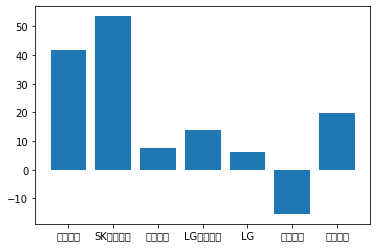

In [52]:
import matplotlib.pyplot as plt
plt.bar(Name,Profit)

영업이익률이 좋은 기업들 중에 은행과 증권사는 따로 분류를 해야함

은행주는 성장주와는 별개로 배당이 높은 특성으로 안전한 투자를 추구하는 투자자에게 적합하기에 은행관련주들은 제외

### 전체 기업들의 연간 수익률을 계산

- 수익률이 높은 기업의 영업이익률 확인

In [50]:
# 삼성전자우, 우리은행 제외
rank_2 = rank_1.drop(26,0)
rank_2 = rank_2.reset_index(drop=True)
rank_2

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
0,005930,삼성전자,38750.0,39400.0,2.313291e+14,1.0,7847664.0,3.046826e+11
1,000660,SK하이닉스,60600.0,61300.0,4.411694e+13,2.0,1934295.0,1.174588e+11
2,068270,셀트리온,214500.0,224500.0,2.691034e+13,3.0,1045357.0,2.285731e+11
3,207940,삼성바이오로직스,374000.0,389500.0,2.474571e+13,5.0,148344.0,5.654277e+10
4,005380,현대차,114000.0,117500.0,2.435817e+13,6.0,565493.0,6.511241e+10
5,051910,LG화학,337000.0,351000.0,2.378962e+13,7.0,227694.0,7.783693e+10
6,017670,SK텔레콤,272500.0,267500.0,2.200321e+13,8.0,129645.0,3.516252e+10
7,015760,한국전력,34050.0,33150.0,2.185888e+13,9.0,1503315.0,5.117194e+10
8,005490,POSCO,237000.0,244500.0,2.066328e+13,10.0,175260.0,4.186762e+10
9,028260,삼성물산,104000.0,105500.0,1.972776e+13,11.0,246954.0,2.580417e+10


In [51]:
#연간 수익률 계산
Profit = []
for i in range(len(rank_2)):
    name = rank_2['Name'][i]
    code = rank_2['Code'][i]
    data = fdr.DataReader(code, '2019-01-01' , '2019-12-31')
    #  수익률 (12월종가 - 1월시가)/1월 시가 * 100
    jan = data.loc['2019-01-02']['Open']
    dec = data.loc['2019-12-30']['Close']
    profit = (dec - jan) / jan * 100
    if profit >= 10:
        Profit.append(code)
    print(name , profit)

삼성전자 41.62436548223351
SK하이닉스 53.507340946166394
셀트리온 -15.590169286014083
삼성바이오로직스 11.16816431322208
현대차 2.553191489361702
LG화학 -9.544159544159545
SK텔레콤 -11.02803738317757
한국전력 -16.138763197586727
POSCO -3.2719836400818
삼성물산 2.843601895734597
NAVER 54.132231404958674
KB금융 2.0342612419700217
신한지주 7.434944237918216
현대모비스 34.38320209973753
SK 0.38314176245210724
LG생활건강 14.014466546112118
삼성생명 -8.812729498164016
삼성에스디에스 -5.121951219512195
SK이노베이션 -16.666666666666664
삼성SDI 6.306306306306306
KT&G -6.666666666666667
기아차 32.436472346786246
삼성화재 -9.14179104477612
LG 6.340057636887608
아모레퍼시픽 -3.8461538461538463
하나금융지주 1.2345679012345678
S-Oil -2.055498458376156
LG전자 13.902053712480253
엔씨소프트 16.469321851453174
셀트리온헬스케어 -27.29268125385829
롯데케미칼 -19.27927927927928
넷마블 -18.590308370044053
현대중공업 -2.3166023166023164
카카오 48.309178743961354
고려아연 -0.5847953216374269
KT -9.090909090909092
LG유플러스 -19.54674220963173
기업은행 -15.412186379928317
삼성전기 19.617224880382775


In [52]:
# 수익률이 10% 이상인 기업들
Profit 

['005930',
 '000660',
 '207940',
 '035420',
 '012330',
 '051900',
 '000270',
 '066570',
 '036570',
 '035720',
 '009150']

In [53]:
bool_oir_4 = rank_1["Code"].str.contains('207940|035420|012330|000270|066570|036570|035720')
code_oir_4 = rank_1[bool_oir_4].reset_index(drop=True)
code_oir_4

,Code,Name,Close,Open,Marcap,Rank,Volume,Amount
0,207940,삼성바이오로직스,374000.0,389500.0,2.474571e+13,5.0,148344.0,5.654277e+10
1,035420,NAVER,118000.0,121000.0,1.944798e+13,12.0,356120.0,4.225138e+10
2,012330,현대모비스,185000.0,190500.0,1.800861e+13,15.0,215479.0,4.020471e+10
3,000270,기아차,32800.0,33450.0,1.329592e+13,23.0,478590.0,1.569839e+10
4,066570,LG전자,62800.0,63300.0,1.027708e+13,30.0,568844.0,3.602874e+10
5,036570,엔씨소프트,467000.0,464500.0,1.024552e+13,31.0,83710.0,3.901083e+10
6,035720,카카오,102000.0,103500.0,8.505553e+12,36.0,173462.0,1.784987e+10


In [55]:
for i in range(len(code_oir_4)):
    code = code_oir_4['Code'][i]
    name = code_oir_4['Name'][i]
    print(name ,fin_data(code,1,"영업이익률",4,"a"))

삼성바이오로직스 ['-10.3', '14.2', '10.4', '13.1']
NAVER ['27.4', '25.2', '16.9', '10.8']
현대모비스 ['7.6', '5.8', '5.8', '6.2']
기아차 ['4.7', '1.2', '2.1', '3.5']
LG전자 ['2.4', '4.0', '4.4', '3.9']
엔씨소프트 ['33.4', '33.3', '35.9', '28.2']
카카오 ['7.9', '8.4', '3.0', '6.7']
